In [9]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
sns.set()
%matplotlib inline 
from datetime import datetime as dt 

In [2]:
#reading the data 
data=pd.read_csv('201902-fordgobike-tripdata (1).csv')

In [3]:
#displaying the first 5 rows 
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#summary statistics of the data 
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
#searching for the null values 
data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
#dropping the null values 
data.dropna(axis=0,inplace=True)

In [7]:
#searching for duplicated values 
data.duplicated().sum()

0

In [8]:
#columns data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [10]:
#making the start time as datetime type
data['start_time']=pd.to_datetime(data['start_time'])

In [11]:
#making the end time as datetime type 
data['end_time']=pd.to_datetime(data['end_time'])

In [12]:
#extracting date 
data['month_day_start']=data['start_time'].dt.day

In [15]:
#extracting month
data['month_start']=data['start_time'].dt.month

In [14]:
#extracting weekday 
data['day_of_week_start']=data['start_time'].dt.weekday

In [16]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_day_start,day_of_week_start,month_start
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,28,3,2
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,28,3,2
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,28,3,2
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,28,3,2
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,28,3,2


In [17]:
#renaming the weekday column
data['day_of_week_start']=data['day_of_week_start'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

In [18]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_day_start,day_of_week_start,month_start
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,28,Thursday,2
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,28,Thursday,2
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,28,Thursday,2
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,28,Thursday,2
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,28,Thursday,2


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
month_day_start            174952 non-null int64
day_of_week_start  

In [20]:
#extracting the hour 
data['start_hour']=data['start_time'].dt.hour

In [21]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_day_start,day_of_week_start,month_start,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,28,Thursday,2,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,28,Thursday,2,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,28,Thursday,2,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,28,Thursday,2,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,28,Thursday,2,23


In [22]:
#making the birth year as int instead of float
data['member_birth_year']=data['member_birth_year'].astype('int')

In [23]:
#creating the user age column 
data['user_age']=2021-data['member_birth_year']

In [25]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_day_start,day_of_week_start,month_start,start_hour,user_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,28,Thursday,2,17,37
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,28,Thursday,2,12,49
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,28,Thursday,2,17,32
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,28,Thursday,2,23,47
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,28,Thursday,2,23,62


In [26]:
#creating the duration of minutes instead of seconds 
data['duration_min']=data['duration_sec']/60

In [27]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_day_start,day_of_week_start,month_start,start_hour,user_age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,28,Thursday,2,17,37,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,28,Thursday,2,12,49,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,28,Thursday,2,17,32,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,28,Thursday,2,23,47,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,28,Thursday,2,23,62,29.883333


# Univariate exploration

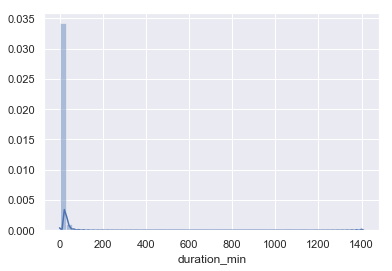

In [30]:

sns.distplot(data['duration_min'])
plt.show()

In [31]:
"""There are so much meaningless data , so i'm removing the outliers """

"There are so much meaningless data , so i'm removing the outliers "

In [32]:
data[data['duration_min']>120].shape[0]/data.shape[0]

0.003075129178288902

In [33]:
"""There are about 0.3% of the data are more than 2 hours , so I'm removing them """

"There are about 0.3% of the data are more than 2 hours , so I'm removing them "

In [36]:
data=data[data['duration_min']<=120]

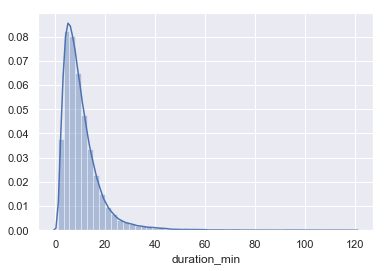

In [37]:
sns.distplot(data['duration_min'])

In [40]:
data=data[data['duration_min']<=60]

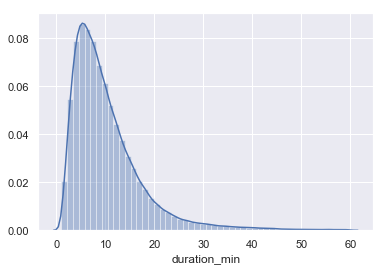

In [41]:
sns.distplot(data['duration_min'])

In [42]:
data=data[data['duration_min']<=30]

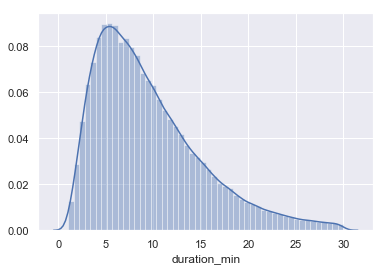

In [43]:
sns.distplot(data['duration_min'])

In [44]:
data.duration_min.describe()

count    168935.000000
mean          9.522287
std           5.609239
min           1.016667
25%           5.283333
50%           8.266667
75%          12.516667
max          30.000000
Name: duration_min, dtype: float64

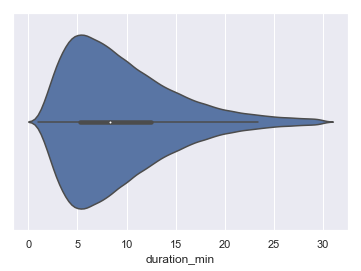

In [45]:
sns.violinplot(data['duration_min'])

In [46]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_day_start,day_of_week_start,month_start,start_hour,user_age,duration_min
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,28,Thursday,2,23,47,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,28,Thursday,2,23,62,29.883333
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983,Female,No,28,Thursday,2,23,38,19.116667
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1989,Male,No,28,Thursday,2,23,32,26.916667
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1988,Other,No,28,Thursday,2,23,33,26.166667


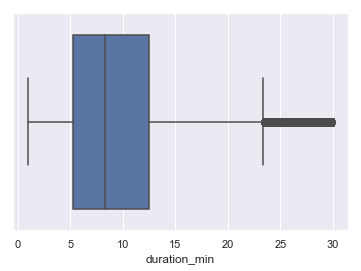

In [48]:
sns.boxplot(data['duration_min'])

In [62]:
data=data[data['duration_min']<=22]

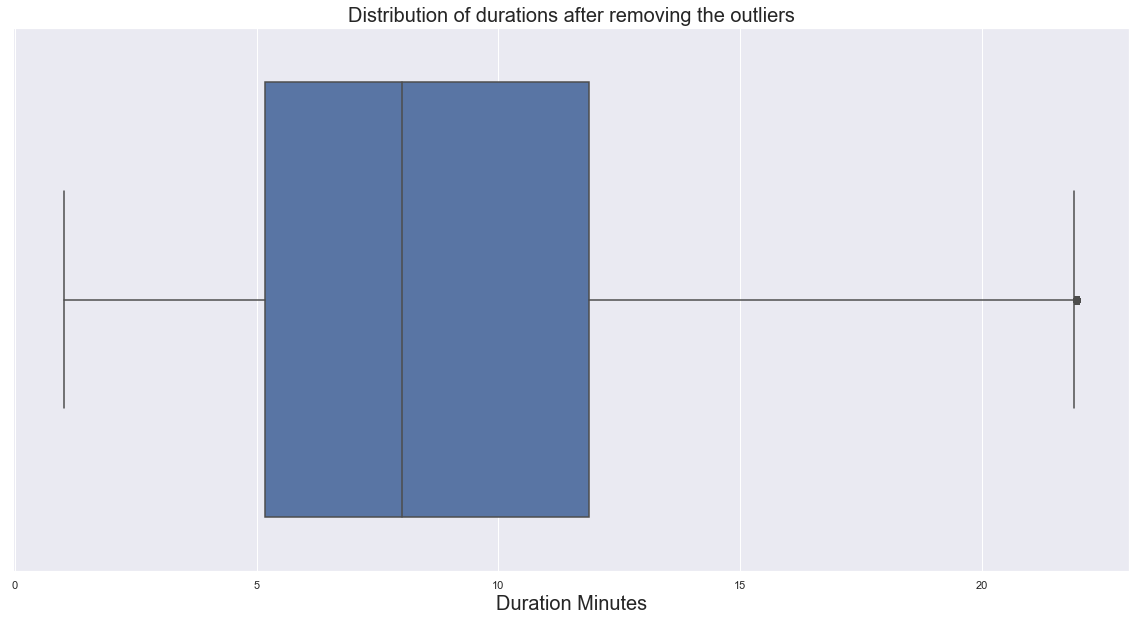

In [111]:
# Boxplot of the durations minute column after removing the outliers 
plt.figure(figsize=(20,10))
sns.boxplot(data['duration_min'])
plt.title('Distribution of durations after removing the outliers',fontsize=20)
plt.xlabel('Duration Minutes',fontsize=20)
plt.show()

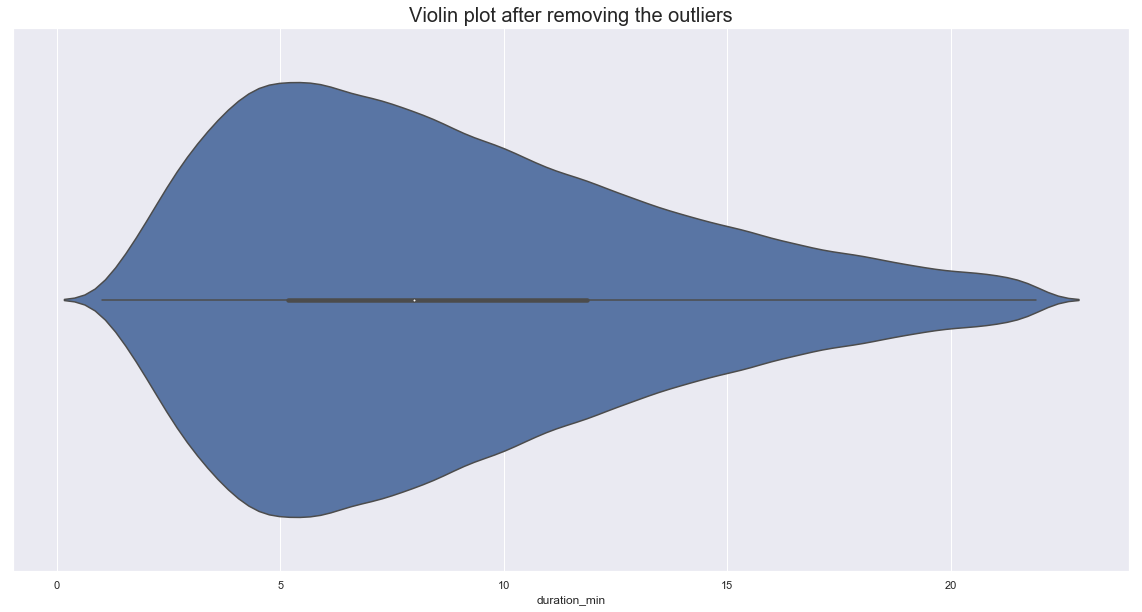

In [112]:
plt.figure(figsize=(20,10))
sns.violinplot(data['duration_min'],fontsize=20)
plt.title('Violin plot after removing the outliers',fontsize=20)
plt.show()


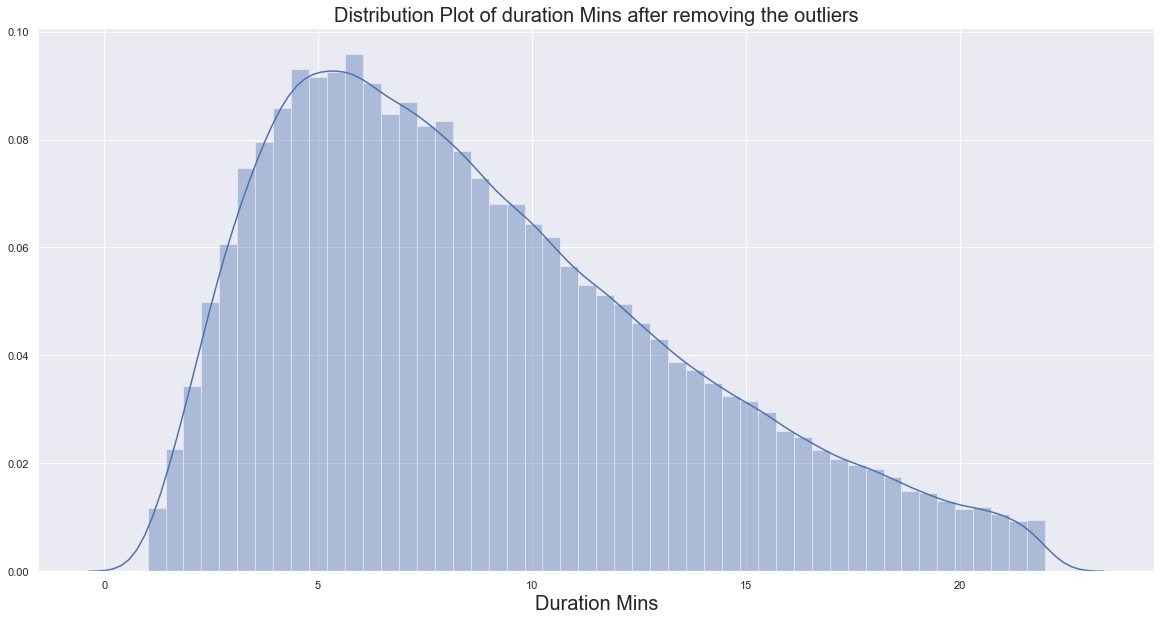

In [115]:
plt.figure(figsize=(20,10))
sns.distplot(data['duration_min'])
plt.xlabel('Duration Mins',fontsize=20)
plt.title('Distribution Plot of duration Mins after removing the outliers',fontsize=20)
plt.show()



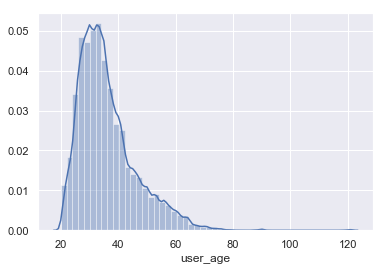

In [51]:
sns.distplot(data['user_age'])

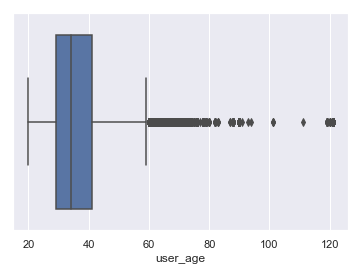

In [52]:
sns.boxplot(data['user_age'])

In [53]:
data=data[data['user_age']<=60]

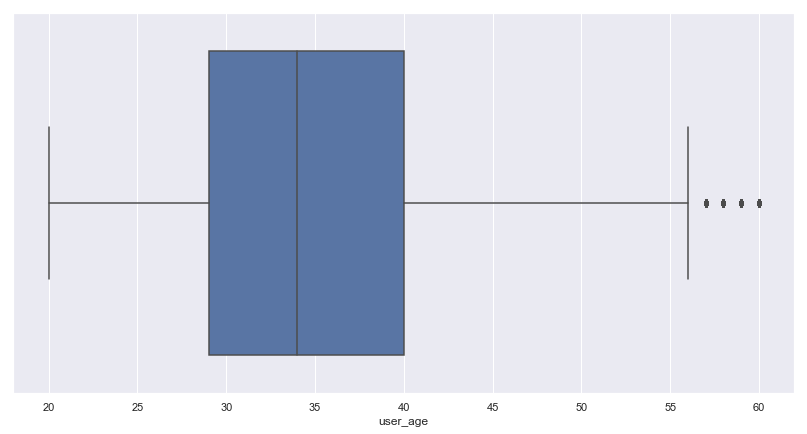

In [55]:
plt.figure(figsize=(14,7))
sns.boxplot(data['user_age'])

In [58]:
data=data[data['user_age']<=55]

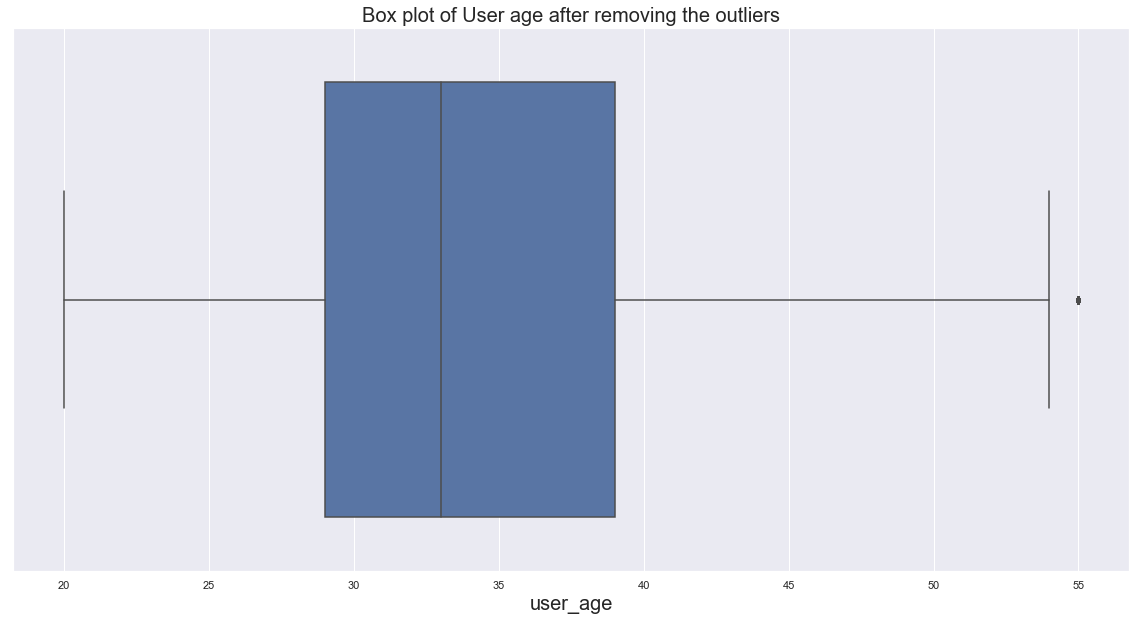

In [116]:
plt.figure(figsize=(20,10))
plt.title('Box plot of User age after removing the outliers',fontsize=20)
sns.boxplot(data['user_age'])
plt.xlabel('user_age',fontsize=20)
plt.show()

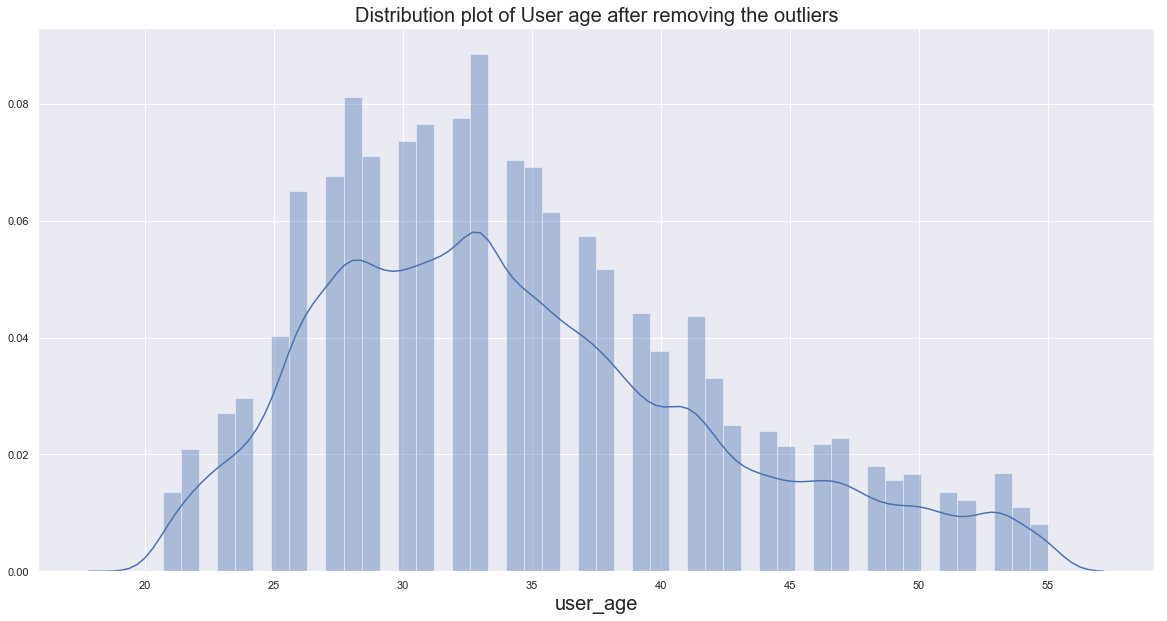

In [117]:

plt.figure(figsize=(20,10))
plt.title('Distribution plot of User age after removing the outliers',fontsize=20)
sns.distplot(data['user_age'])
plt.xlabel('user_age',fontsize=20)
plt.show()

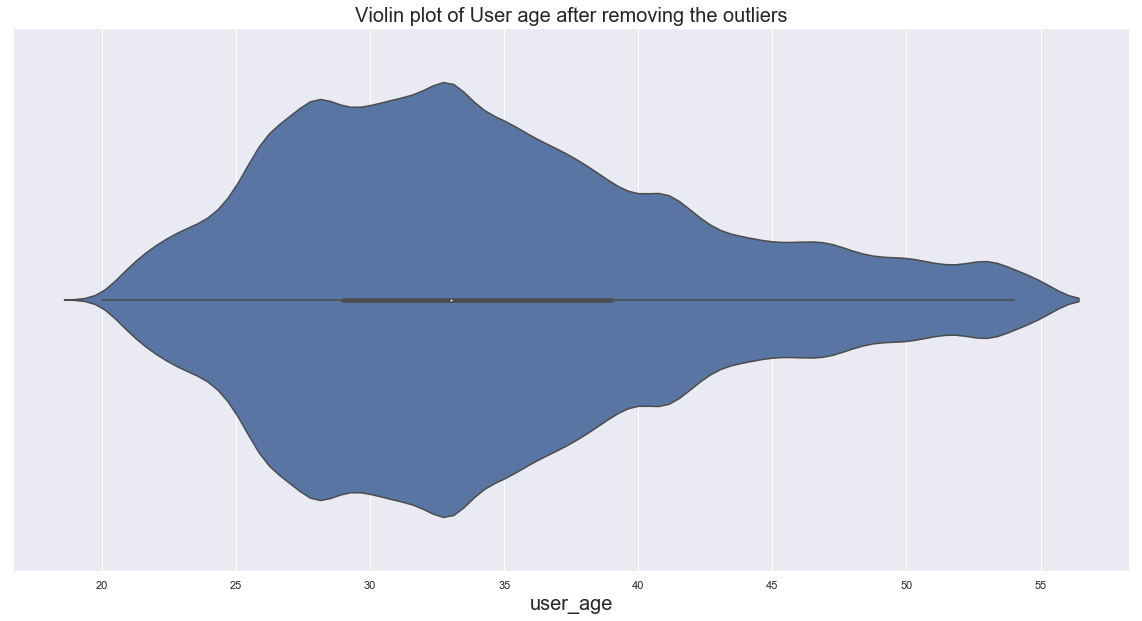

In [118]:

plt.figure(figsize=(20,10))
plt.title('Violin plot of User age after removing the outliers',fontsize=20)
sns.violinplot(data['user_age'])
plt.xlabel('user_age',fontsize=20)
plt.show()

In [65]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_day_start,day_of_week_start,month_start,start_hour,user_age,duration_min
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983,Female,No,28,Thursday,2,23,38,19.116667
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,Subscriber,1992,Male,No,28,Thursday,2,23,29,17.483333
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Subscriber,1996,Female,Yes,28,Thursday,2,23,25,7.633333
11,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,...,Subscriber,1993,Male,No,28,Thursday,2,23,28,8.433333
12,1176,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,127.0,Valencia St at 21st St,37.756708,-122.421025,323.0,Broadway at Kearny,37.798014,...,Customer,1990,Male,No,28,Thursday,2,23,31,19.600000


In [66]:
data.shape

(152821, 22)

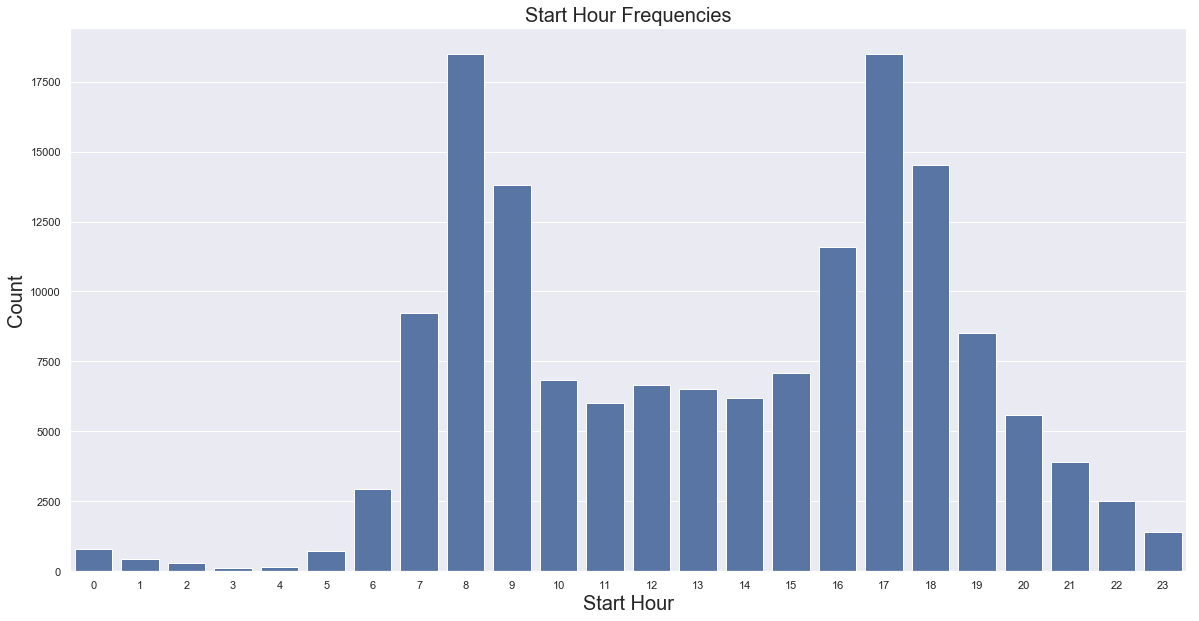

In [124]:
plt.figure(figsize=(20,10))
sns.countplot(data['start_hour'],color=sns.color_palette()[0])
plt.title('Start Hour Frequencies',fontsize=20)
plt.xlabel('Start Hour',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()


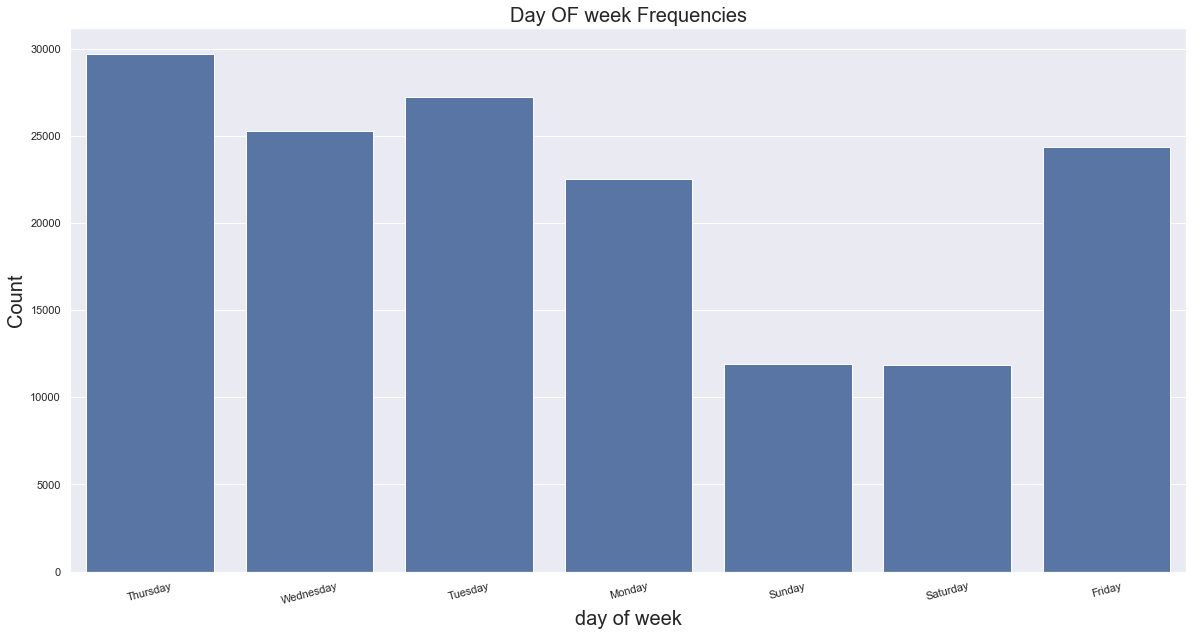

In [125]:
plt.figure(figsize=(20,10))
sns.countplot(data['day_of_week_start'],color=sns.color_palette()[0])
plt.xticks(rotation=15)
plt.title('Day OF week Frequencies',fontsize=20)
plt.xlabel('day of week',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

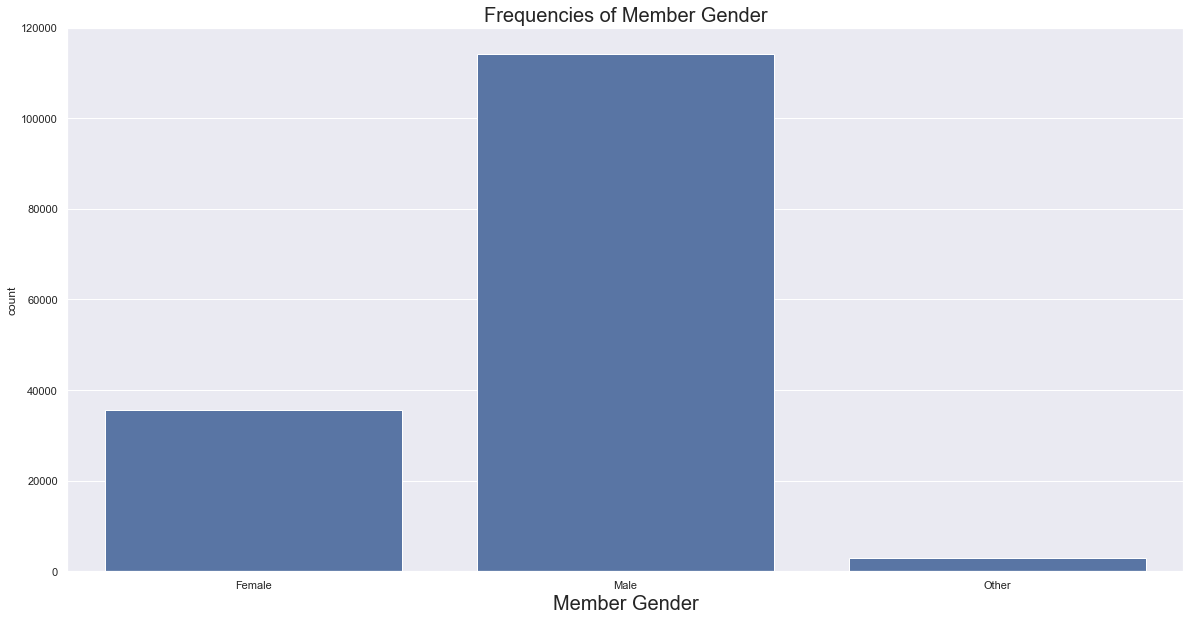

In [135]:
plt.figure(figsize=(20,10))
sns.countplot(data['member_gender'],color=sns.color_palette()[0])
plt.title('Frequencies of Member Gender',fontsize=20)
plt.xlabel('Member Gender',fontsize=20)
plt.show()

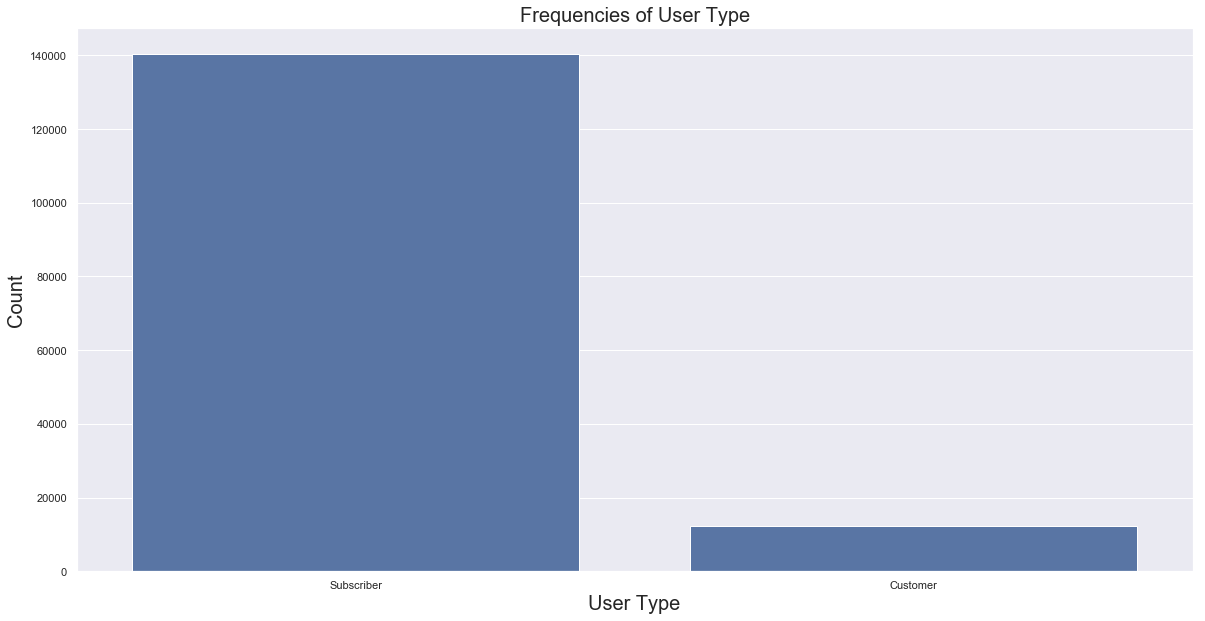

In [134]:
plt.figure(figsize=(20,10))
sns.countplot(data['user_type'],color=sns.color_palette()[0])
plt.title('Frequencies of User Type',fontsize=20)
plt.xlabel('User Type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()


# Bivariate exploration

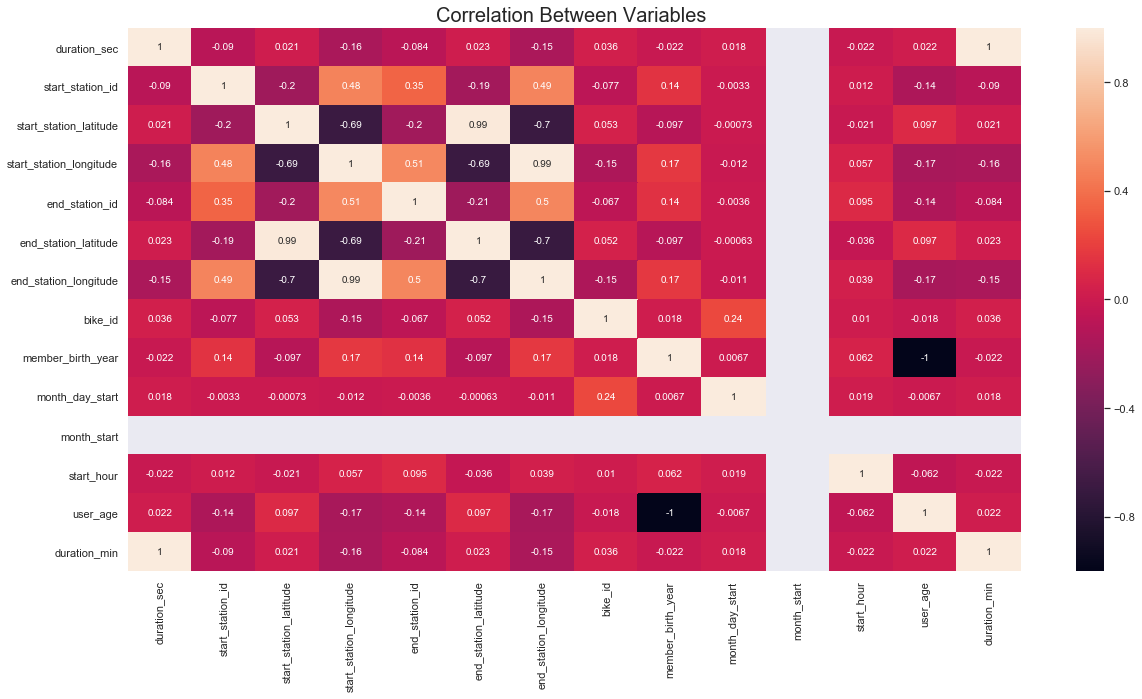

In [131]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Between Variables ',fontsize=20)
plt.show()

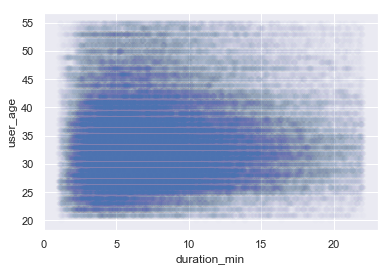

In [84]:
sns.scatterplot(data['duration_min'],data['user_age'],alpha=0.01)

In [85]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_day_start,day_of_week_start,month_start,start_hour,user_age,duration_min
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983,Female,No,28,Thursday,2,23,38,19.116667
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,Subscriber,1992,Male,No,28,Thursday,2,23,29,17.483333
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Subscriber,1996,Female,Yes,28,Thursday,2,23,25,7.633333
11,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,...,Subscriber,1993,Male,No,28,Thursday,2,23,28,8.433333
12,1176,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,127.0,Valencia St at 21st St,37.756708,-122.421025,323.0,Broadway at Kearny,37.798014,...,Customer,1990,Male,No,28,Thursday,2,23,31,19.600000


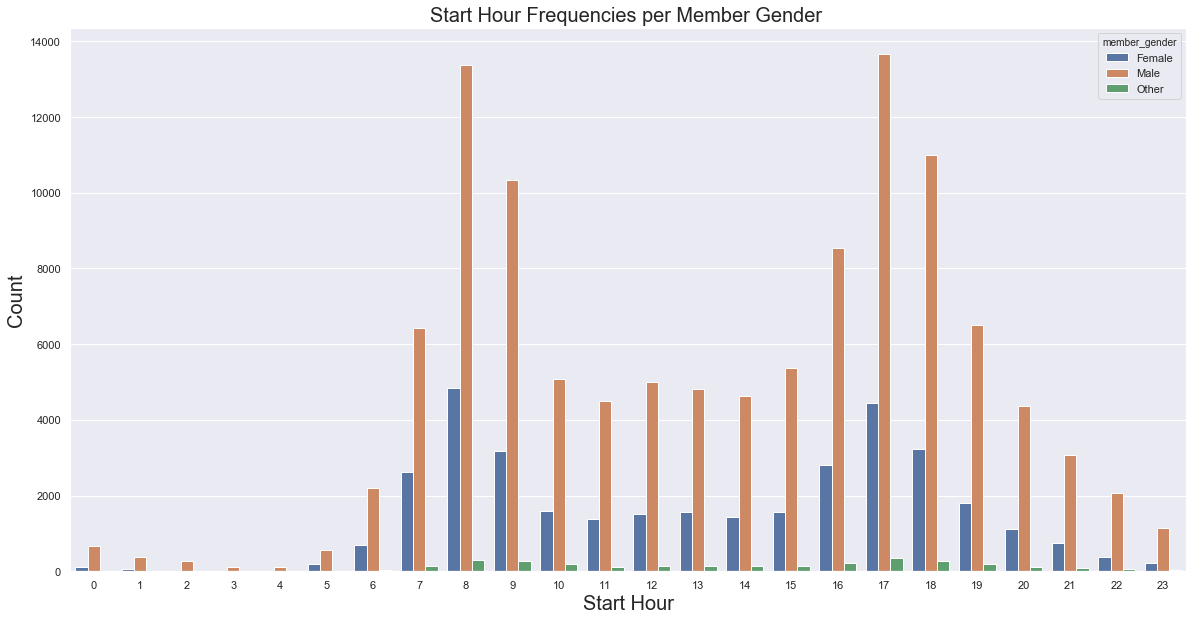

In [130]:
plt.figure(figsize=(20,10))
sns.countplot(data['start_hour'],hue=data['member_gender'])
plt.title('Start Hour Frequencies per Member Gender ',fontsize=20)
plt.xlabel('Start Hour',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()


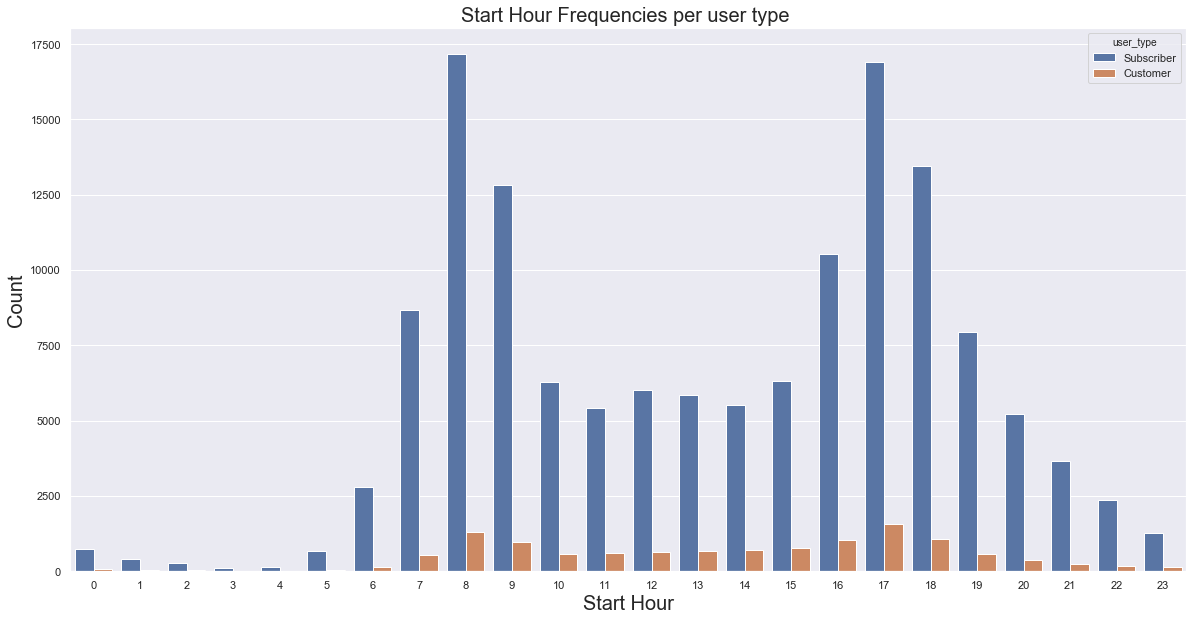

In [129]:
plt.figure(figsize=(20,10))
sns.countplot(data['start_hour'],hue=data['user_type'])
plt.title('Start Hour Frequencies per user type ',fontsize=20)
plt.xlabel('Start Hour',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()


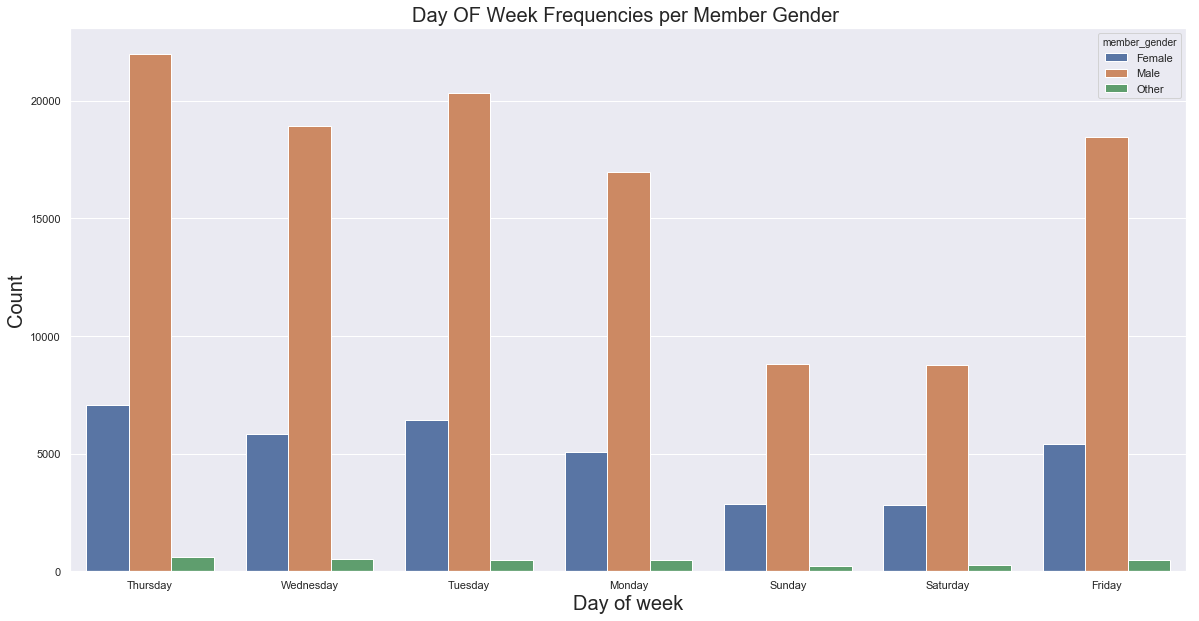

In [128]:
plt.figure(figsize=(20,10))
sns.countplot(data['day_of_week_start'],hue=data['member_gender'])
plt.title('Day OF Week Frequencies per Member Gender ',fontsize=20)
plt.xlabel('Day of week',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()


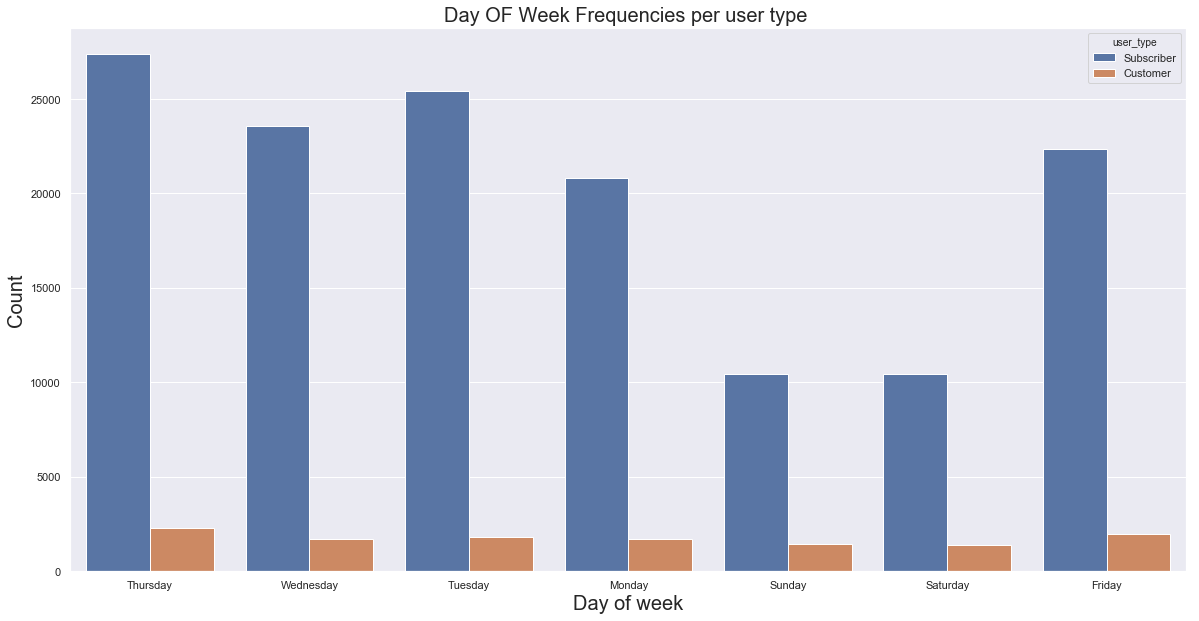

In [127]:
plt.figure(figsize=(20,10))
sns.countplot(data['day_of_week_start'],hue=data['user_type'])
plt.title('Day OF Week Frequencies per user type ',fontsize=20)
plt.xlabel('Day of week',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()


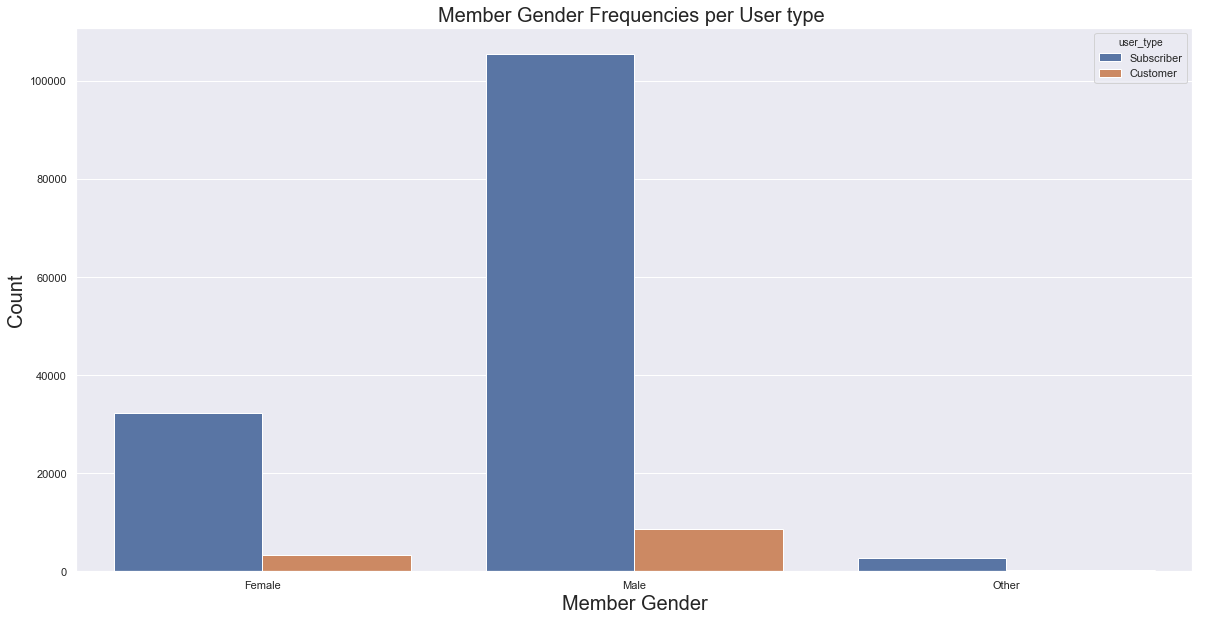

In [126]:
plt.figure(figsize=(20,10))
plt.title('Member Gender Frequencies per User type ',fontsize=20)
sns.countplot(data['member_gender'],hue=data['user_type'])
plt.xlabel('Member Gender',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

# Multivariate exploration

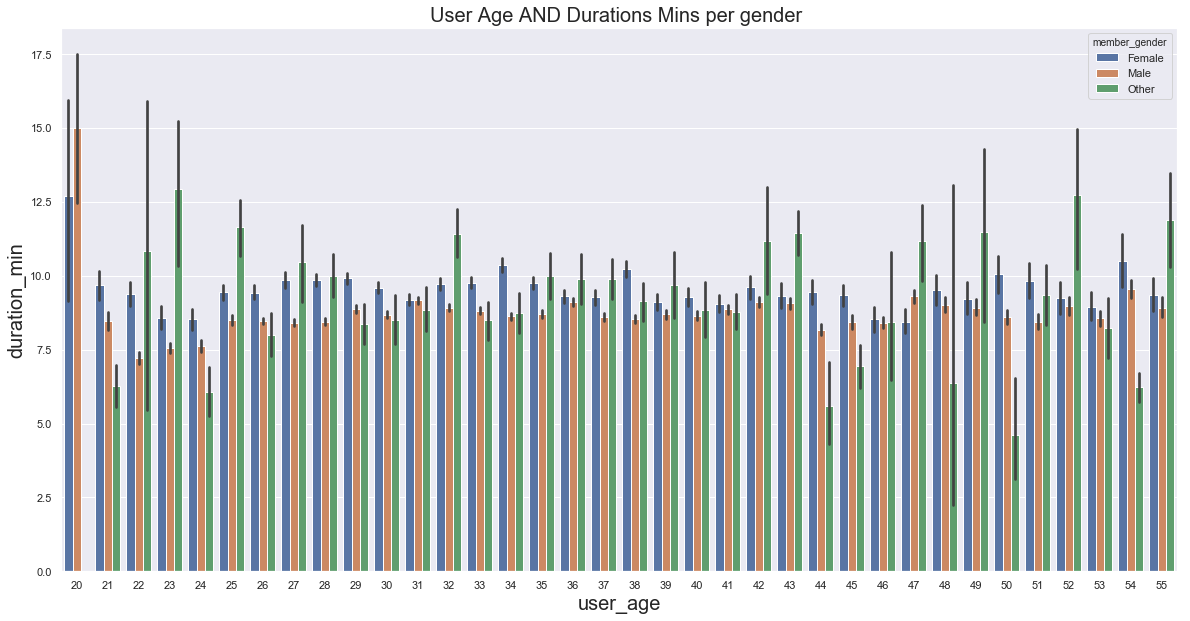

In [123]:
plt.figure(figsize=(20,10))
plt.title('User Age AND Durations Mins per gender ',fontsize=20)
plt.xlabel('User Age',fontsize=20)
plt.ylabel('Durations Mins',fontsize=20)
sns.barplot(data['user_age'],data['duration_min'],hue=data['member_gender'])
plt.show()


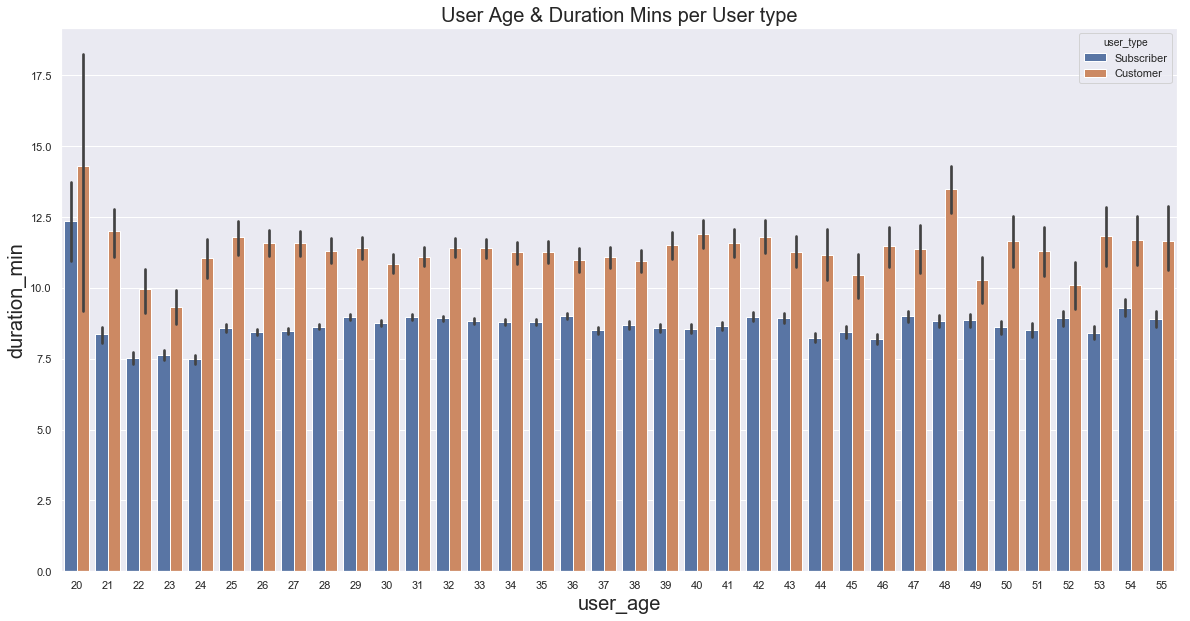

In [122]:
plt.figure(figsize=(20,10))
plt.title('User Age & Duration Mins per User type',fontsize=20)
plt.xlabel('User Age',fontsize=20)
plt.ylabel('Duration Mins',fontsize=20)
sns.barplot(data['user_age'],data['duration_min'],hue=data['user_type'])
plt.show()

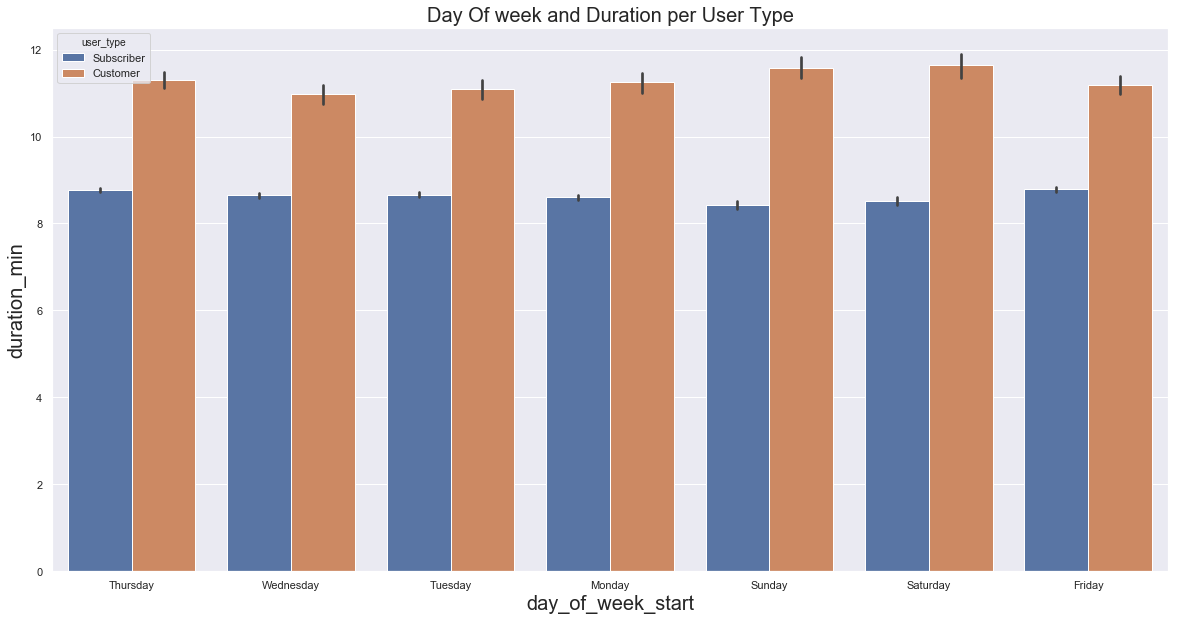

In [121]:
plt.figure(figsize=(20,10))
plt.title('Day Of week and Duration per User Type',fontsize=20)
plt.xlabel('Day OF week',fontsize=20)
plt.ylabel('Durations per Mins',fontsize=20)
sns.barplot(data['day_of_week_start'],data['duration_min'],hue=data['user_type'])

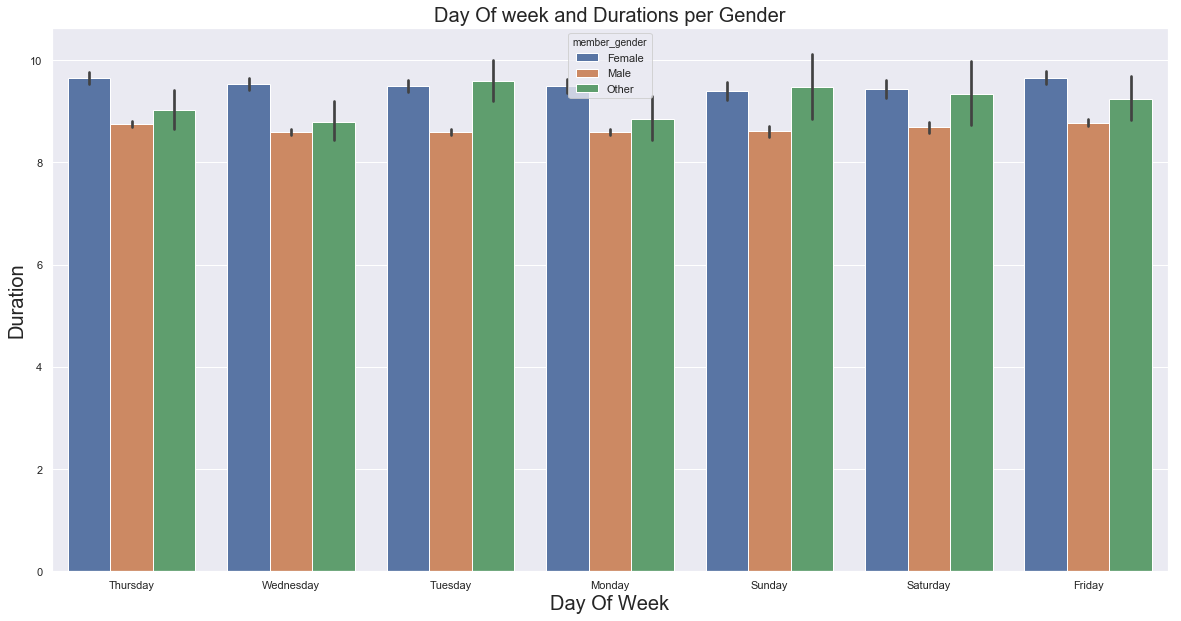

In [119]:
plt.figure(figsize=(20,10))
plt.title('Day Of week and Durations per Gender',fontsize=20)
sns.barplot(data['day_of_week_start'],data['duration_min'],hue=data['member_gender'])
plt.xlabel('Day Of Week',fontsize=20)
plt.ylabel('Duration',fontsize=20)
plt.show()

In [108]:
data.to_csv('bikes_cleaned.csv')

In [ ]:
!jupyter nbconvert Bike_Exploratory.ipynb --to slides --post serve --no-input --no-prompt